# Day 06 - Polynomial Regression Models
## Sept. 24, 2020

<img src="./images/cmse.png"
     alt="CMSE logo"
     style="float: right; margin-left: 50px; width: 600px;" />

# From Pre-Class Assignment

## Challenging bits

* How to fit data with more than one feature
* How to determine a good fit when multiple features are used
* How to make sure `OLS` is doing the fit that I want

**You will get more practice with this today.**

## Things that are still important:

* What is a regression model?
* How does a regression model work?
* What are the concerns about fitting with a line (or other function)?
* How do we determine if the fit is good?

## Let's start by making some data

We will use quintic data: $y = 5x^5 + 3x^4 - 6x^3 + 2x^2 -3x + 2$ from $x =$ -2 to +2

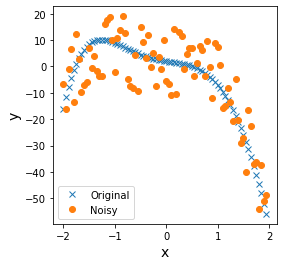

In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x_ary = np.arange(-2, 2, 0.05)
y_ary = +x_ary**5 - 3*x_ary**4 - 6*x_ary**3 + 2*x_ary**2 - 3*x_ary + 2
y_noisy = y_ary + np.random.uniform(-15, 15.0, len(y_ary))

fig = plt.figure(figsize=(4,4))
plt.plot(x_ary, y_ary, 'x')
plt.plot(x_ary, y_noisy, 'o')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(['Original', 'Noisy'])

## Let's make a model using up to $x^{10}$

Our model will try to fit:

$$y = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + c_5x^5 + c_6x^6 + c_7 x^7 + c_8 x^8 + c_9 x^9 + c_{10} x^{10} +\epsilon $$

to the noisy data. `statsmodels` will estimate the $c_i$ each time we make the model. We will be able to set different $c_i$'s to zero to reduce the complexity of the model.

In [2]:
import pandas as pd

column_names = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

const_values = np.ones(len(x_ary))

data = np.array([const_values, x_ary, x_ary**2, x_ary**3, x_ary**4, 
                 x_ary**5,x_ary**6, x_ary**7, x_ary**8, x_ary**9, 
                 x_ary**10])

df = pd.DataFrame(data.T, columns = column_names)    
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.0,-2.00,4.0000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,256.000000,-512.000000,1024.000000
1,1.0,-1.95,3.8025,-7.414875,14.459006,-28.195062,54.980371,-107.211724,209.062862,-407.672580,794.961532
2,1.0,-1.90,3.6100,-6.859000,13.032100,-24.760990,47.045881,-89.387174,169.835630,-322.687698,613.106626
3,1.0,-1.85,3.4225,-6.331625,11.713506,-21.669987,40.089475,-74.165529,137.206229,-253.831523,469.588318
4,1.0,-1.80,3.2400,-5.832000,10.497600,-18.895680,34.012224,-61.222003,110.199606,-198.359290,357.046723


## Ok let's run an OLS model using only the constant term

$$y_0 = c_0 + \epsilon$$

In [3]:
model = sm.OLS(y_noisy, df['x0']) # make the model
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 24 Sep 2020   Prob (F-statistic):                nan
Time:                        09:59:03   Log-Likelihood:                -336.63
No. Observations:                  80   AIC:                             675.3
Df Residuals:                      79   BIC:                             677.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            -4.3464      1.830     -2.375      0.020      -7.989      -0.704
==============================================================================
Omnibus:                       17.777   Durbin-Watson:                   0.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.089
Skew:                          -1.138   Prob(JB):                     2.63e-05
Kurtosis:                       4.070   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## That was bad ($R^2 = 0$). Let's add the linear term.

$$y_1 = c_1 x + c_0 + \epsilon$$

In [4]:
model = sm.OLS(y_noisy, df[['x0','x1']]) # make the model
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     36.35
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           5.16e-08
Time:                        09:59:03   Log-Likelihood:                -321.33
No. Observations:                  80   AIC:                             646.7
Df Residuals:                      78   BIC:                             651.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0            -4.5450      1.521     -2.988      0.004      -7.573      -1.516
x1            -7.9419      1.317     -6.029      0.000     -10.564      -5.320
==============================================================================
Omnibus:                        3.622   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.546
Skew:                          -0.471   Prob(JB):                        0.170
Kurtosis:                       2.579   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## That is better ($R^2 = 0.457$). Let's add the quadratic term

$$y_2 = c_2 x^2 + c_1 x + c_0 + \epsilon$$

In [5]:
model = sm.OLS(y_noisy, df[['x0','x1', 'x2']]) # make the model
results = model.fit() 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     79.72
Date:                Thu, 24 Sep 2020   Prob (F-statistic):           1.74e-19
Time:                        09:59:03   Log-Likelihood:                -291.75
No. Observations:                  80   AIC:                             589.5
Df Residuals:                      77   BIC:                             596.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0             6.3081      1.586      3.976      0.000       3.149       9.467
x1            -8.3491      0.917     -9.104      0.000     -10.175      -6.523
x2            -8.1449      0.887     -9.180      0.000      -9.912      -6.378
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                2.550
Skew:                          -0.076   Prob(JB):                        0.279
Kurtosis:                       2.139   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ok let's run this for each choice with increasing powers of $x$
$$y_0 = c_0 + \epsilon$$
$$y_1 = c_1 x + c_0 + \epsilon$$
$$\dots$$
$$y_{10} = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + c_5x^5 + c_6x^6 + c_7 x^7 + c_8 x^8 + c_9 x^9 + c_{10} x^{10} +\epsilon $$

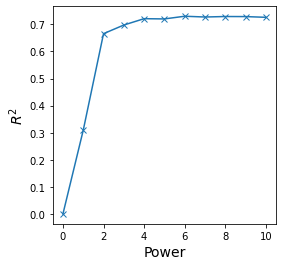

In [6]:
rsqr_arry = []
columns = []

for column in column_names:
    
    columns.append(column)
    model = sm.OLS(y_noisy, df[columns]) # make the model
    results = model.fit()                 # run the OLS fit
    rsqr_arry.append(results.rsquared_adj)

fig = plt.figure(figsize=(4,4))
plt.plot(np.arange(0,11,1), rsqr_arry, 'x-')
plt.xlabel('Power', fontsize = 14)
plt.ylabel(r'$R^2$', fontsize = 14);

## The quality of the fit "saturates" at $x^5$

As we might have expected, $y_5 = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + c_5x^5 +\epsilon $ produces the "best" model

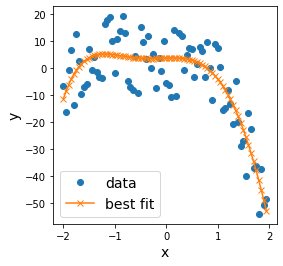

In [7]:
best_fit = ['x0', 'x1', 'x2', 'x3', 'x4', 'x5']

model = sm.OLS(y_noisy, df[best_fit]) # make the model
results_b = model.fit() 

fig = plt.figure(figsize=(4,4))
plt.plot(x_ary, y_noisy, 'o')
plt.plot(x_ary, results_b.predict(), '-x')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(['data', 'best fit'], fontsize = 14)

## Let's look at the fits of other models

Linear fit: $y_1 c_1 x + c_0 +\epsilon$

This is underfitting!

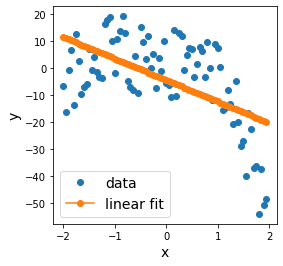

In [8]:
linear_fit = ['x0','x1']

model = sm.OLS(y_noisy, df[linear_fit]) # make the model
results_l = model.fit() 

fig = plt.figure(figsize=(4,4))
plt.plot(x_ary, y_noisy, 'o')
plt.plot(x_ary, results_l.predict(), '-o')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(['data', 'linear fit'], fontsize = 14)

## Let's look at the fits of other models

Full fit: $y = c_0 + c_1x + c_2x^2 + c_3x^3 + c_4x^4 + c_5x^5 + c_6x^6 + c_7 x^7 + c_8 x^8 + c_9 x^9 + c_{10} x^{10} +\epsilon $$

This is overfitting!

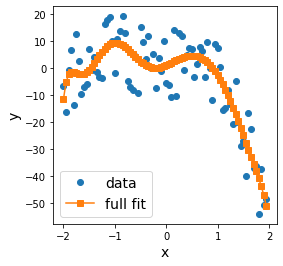

In [9]:
full_fit = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10']

model = sm.OLS(y_noisy, df[full_fit]) # make the model
results_f = model.fit() 

fig = plt.figure(figsize=(4,4))
plt.plot(x_ary, y_noisy, 'o')
plt.plot(x_ary, results_f.predict(), '-s')
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)
plt.legend(['data', 'full fit'], fontsize = 14)

## Let's compare the best fit to the full fit

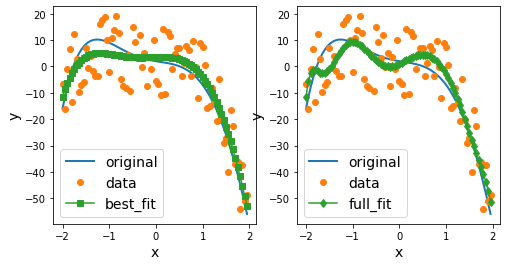

In [10]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (8,4))

ax1.plot(x_ary, y_ary, '-', lw = 2)
ax1.plot(x_ary, y_noisy, 'o')
ax1.plot(x_ary, results_b.predict(), '-s')
ax2.plot(x_ary, y_ary, '-', lw = 2)
ax2.plot(x_ary, y_noisy, 'o')
ax2.plot(x_ary, results_f.predict(), '-d')
ax1.set_xlabel('x', fontsize = 14)
ax2.set_xlabel('x', fontsize = 14)
ax1.set_ylabel('y', fontsize = 14)
ax2.set_ylabel('y', fontsize = 14)
ax1.legend(['original', 'data', 'best_fit'], fontsize = 14)
ax2.legend(['original', 'data', 'full_fit'], fontsize = 14)

## Let's compare the data to the fitted values

We would expect a perfect model to produce a line.

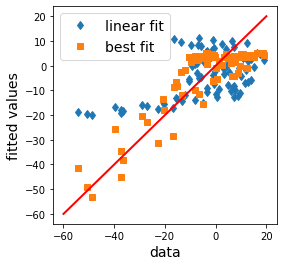

In [11]:
fig = plt.figure(figsize = (4,4))
plt.plot(y_noisy, results_l.predict(), 'd')
plt.plot(y_noisy, results_b.predict(), 's')

plt.plot([-60,20], [-60,20], '-r', lw=2)
plt.xlabel('data', fontsize = 14)
plt.ylabel('fitted values', fontsize = 14)
plt.legend(['linear fit', 'best fit'], fontsize = 14)

# Questions, Comments, Concerns?